# Read the data and rename some parameters
Ref: He et al., 2011, SIMULATING TRANSIENT CLIMATE EVOLUTION OF THE LAST DEGLACIATION WITH CCSM3

In [1]:
import xarray as xr

# import .nc data
ds_trace = xr.open_dataset('TraCE_data/trace.01-36.22000BP.cam2.TREFHT.22000BP_decavg_400BCE.nc')

# rename the TREFHT to sat
ds_trace = ds_trace.rename({'TREFHT': 'sat'})
# rename the time to age
ds_trace = ds_trace.rename({'time': 'age'})
# multiply age by 1000
ds_trace['age'] = ds_trace['age'] * -1000

# convert the sat to degrees C
ds_trace['sat'] = ds_trace['sat'] - 273.15

ds_trace = ds_trace[['sat']]
ds_trace.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (age: 2204, lat: 48, lon: 96)
Coordinates:
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * age      (age) float64 2.2e+04 2.199e+04 2.198e+04 ... -10.0 -20.0 -30.0
Data variables:
    sat      (age, lat, lon) float32 -57.14 -57.51 -57.91 ... -24.48 -24.36
Attributes:
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b30.22_0kaDVT
    title:                     b30.22_0kaDVT b30.22_0kaDVT
    logname:                   fenghe
    host:                      phoenix
    Version:                   $Name: ccsm3_0_1_beta22 $
    revision_Id:               $Id: history.F90,v 1.26.2.48.4.1.4.1 2006/01/2...
    history:                   Sat Oct 26 04:30:38 2013: /glade/apps/opt/nco/...
    nco_openmp_thread_number:  1
    NCO:                       4.2.3>

# Read the LGMR T
Ref Osman et al., 2021, DOI: https://doi.org/10.1073/pnas.2104105118

In [2]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_LGMR = xr.open_dataset('data/LGMR_SAT_climo.nc')
ds_LGMR.info

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 ...
    sat_std  (age, lat, lon) float32 ...>

# EBM data

In [10]:
# import scipy.io
# import numpy as np

# # Load the files
# meanT_data = scipy.io.loadmat('D:/VScode/Last_deglaciation/data/meanT.mat')
# meanT_0_data = scipy.io.loadmat('D:/VScode/Last_deglaciation/data/meanT_0.mat')
# lat_data = scipy.io.loadmat('D:/VScode/Last_deglaciation/data/lat.mat')
# T_c_age0_F0_data= scipy.io.loadmat('D:/VScode/Last_deglaciation/data/T_c_age0_F0.mat')
# T_c_age23_Flgm_data= scipy.io.loadmat('D:/VScode/Last_deglaciation/data/T_c_age23_Flgm.mat')

# meanT = meanT_data['meanT']
# meanT_0 = meanT_data['meanT']
# lat = lat_data['lat']
# T_c_age0_F0 = T_c_age0_F0_data['T_c_age0_F0']
# T_c_age23_Flgm = T_c_age23_Flgm_data['T_c_age23_Flgm']

# # calculate the mean of T_c_age0_F0 
# T_c_0= np.mean(T_c_age0_F0, axis=0)
# T_c_23= np.mean(T_c_age23_Flgm, axis=0)

# EBM temperature data along latitudes

In [3]:
import scipy.io
import numpy as np

path='D:/VScode/Last_deglaciation/EBM_data/'
T_lats_0=scipy.io.loadmat(path+'T_lats_0.mat')
T_lats_20=scipy.io.loadmat(path+'T_lats_20.mat')

T_lats_0=T_lats_0['temp']
T_lats_20=T_lats_20['temp']

# Plot

In [26]:
import xarray as xr

def calculate_mean_temperature(ds, var_name, age_target):
    """
    Calculates the mean temperature for each Southern Hemisphere latitude in the given dataset.

    Parameters:
    ds (xarray.Dataset): The dataset to process.
    var_name (str): The variable name of the temperature data in the dataset.
    age_target (float): The target age to approximate.

    Returns:
    xarray.DataArray: Mean temperatures for each latitude.
    """
    # Select the data slice closest to the specified age
    sat_data_closest = ds.sel(age=age_target, method='nearest')

    # Filter out only Southern Hemisphere (latitudes < 0)
    southern_hemisphere_data = sat_data_closest.where(sat_data_closest.lat < 0, drop=True)

    # Calculate the mean temperature for each latitude
    mean_temp_per_latitude = southern_hemisphere_data[var_name].mean(dim='lon')

    return mean_temp_per_latitude




In [29]:
mean_temp_LGMR_age0 = calculate_mean_temperature(ds_LGMR, 'sat', 0)

LGMR_T_lats_age0 = np.column_stack((mean_temp_LGMR_age0.lat.values, mean_temp_LGMR_age0.values))

LGMR_T_lats_age0.shape

import pandas as pd

df = pd.DataFrame(LGMR_T_lats_age0, columns=['Latitude', 'Temperature'])

# Save the DataFrame to a CSV file
df.to_csv('D:/VScode/Last_deglaciation/data/LGMR_T_lats_age0.csv', index=False)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [30]:
mean_temp_LGMR_age24k = calculate_mean_temperature(ds_LGMR, 'sat', 24000)

LGMR_T_lats_age24k = np.column_stack((mean_temp_LGMR_age24k.lat.values, mean_temp_LGMR_age24k.values))

LGMR_T_lats_age24k.shape

import pandas as pd

df = pd.DataFrame(LGMR_T_lats_age24k, columns=['Latitude', 'Temperature'])

# Save the DataFrame to a CSV file
df.to_csv('D:/VScode/Last_deglaciation/data/LGMR_T_lats_age24k.csv', index=False)

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


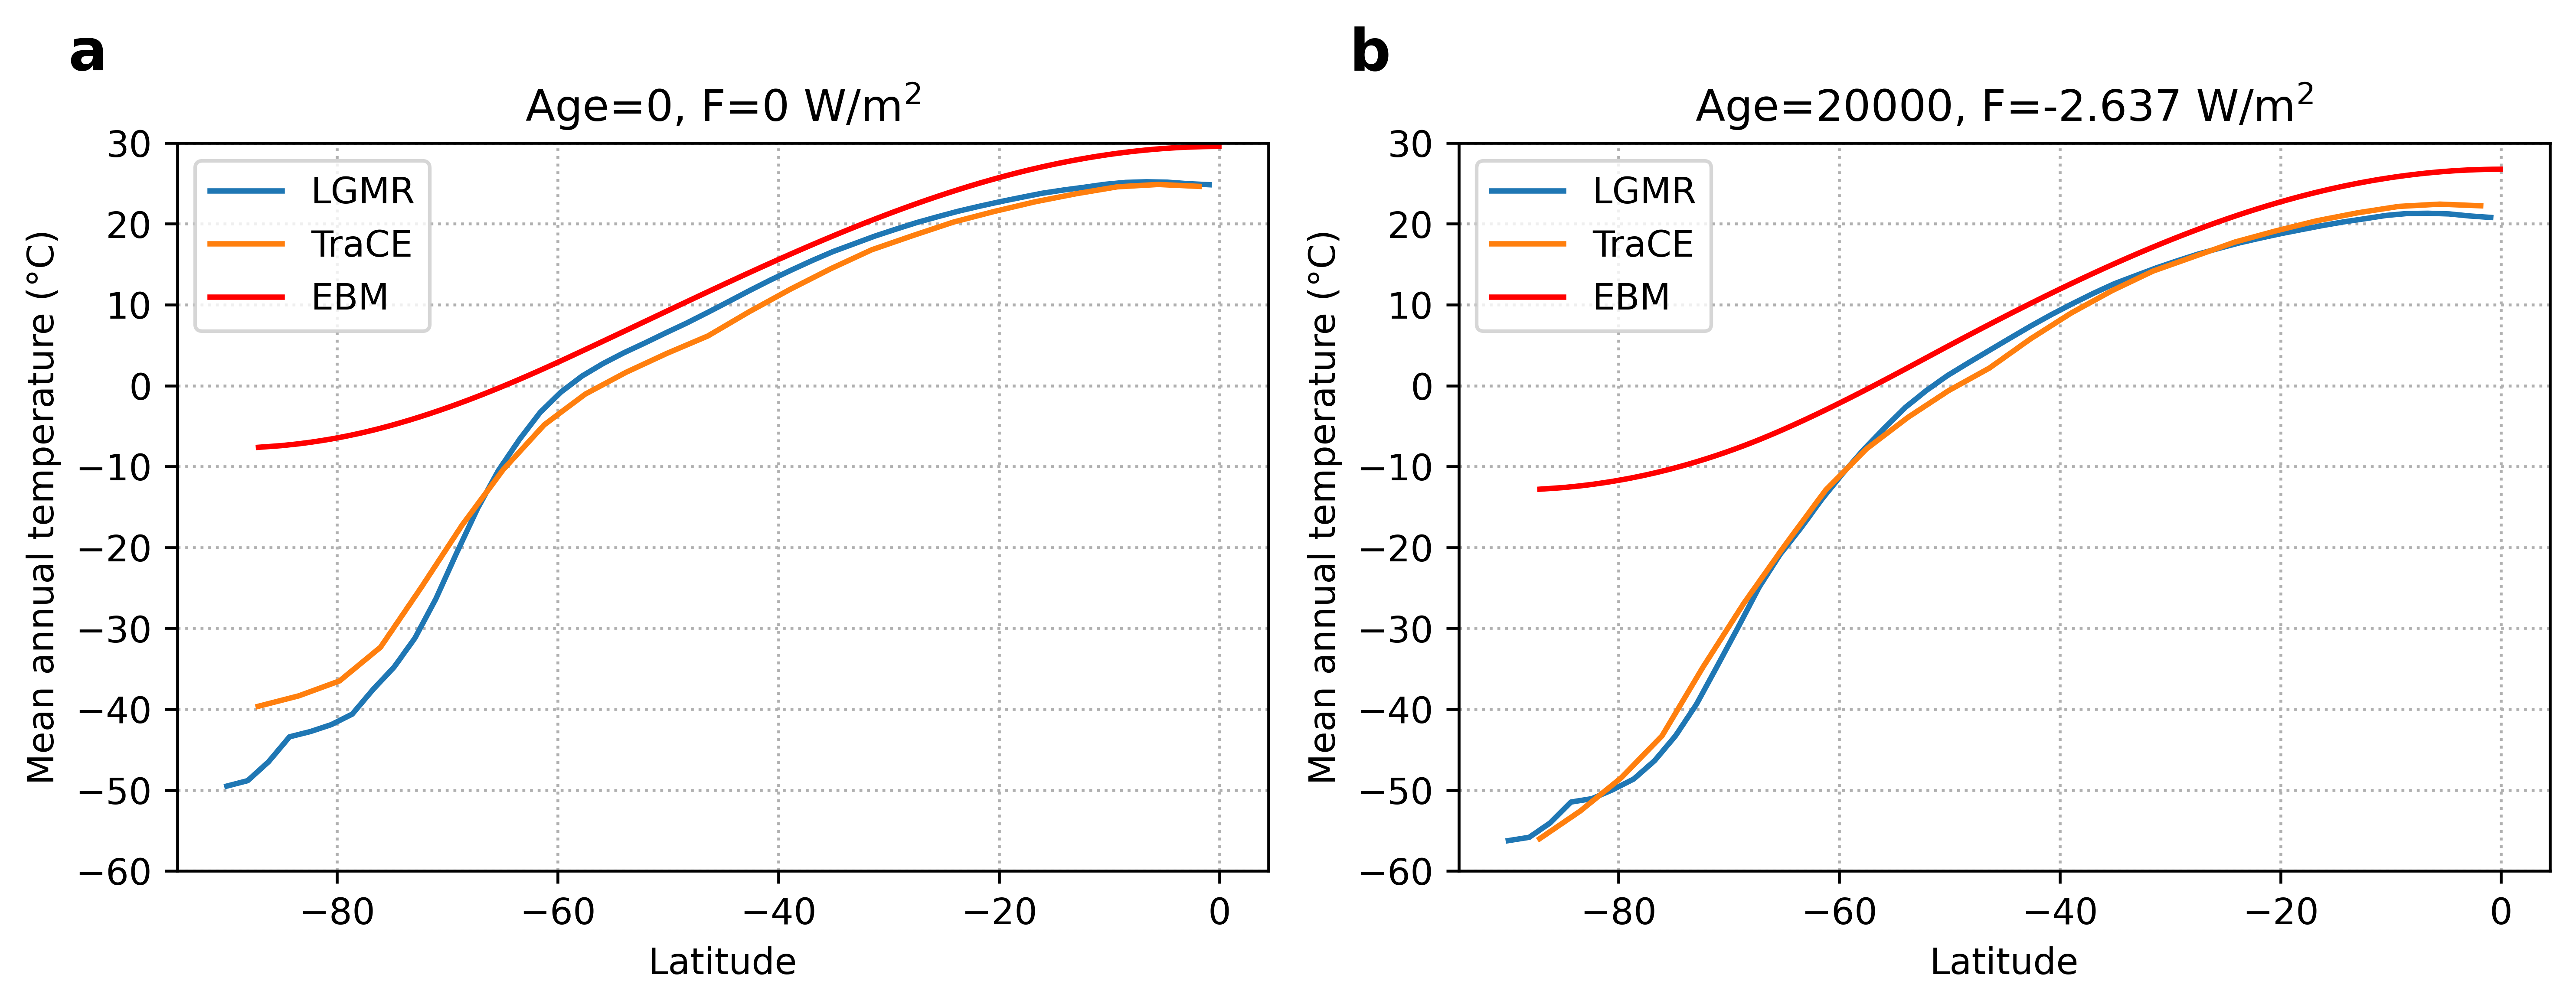

In [12]:
import matplotlib.pyplot as plt


# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4),dpi=600)

# Recalculate mean temperatures for Age=0
mean_temp_LGMR = calculate_mean_temperature(ds_LGMR, 'sat', 0)
mean_temp_trace = calculate_mean_temperature(ds_trace, 'sat', 0)


# Second subplot for Age=0
axes[0].plot(mean_temp_LGMR['lat'], mean_temp_LGMR, label='LGMR')
axes[0].plot(mean_temp_trace['lat'], mean_temp_trace, label='TraCE')
# axes[0].plot(lat[:, 1], meanT_0[0, :], 'r', label='EBM')
# axes[0].plot(lat[:, 1], T_c_0, 'g', label='EBM')
axes[0].plot(T_lats_0[:,0], T_lats_0[:,1], 'r', label='EBM')
# set y-axis limits
axes[0].set_ylim(-60, 30)
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Mean annual temperature (°C)')
axes[0].set_title('Age=0, F=0 W/m$^2$')
axes[0].legend()
axes[0].grid(linestyle='dotted')



mean_temp_LGMR = calculate_mean_temperature(ds_LGMR, 'sat', 20000)
mean_temp_trace = calculate_mean_temperature(ds_trace, 'sat', 20000)
axes[1].plot(mean_temp_LGMR['lat'], mean_temp_LGMR, label='LGMR')
axes[1].plot(mean_temp_trace['lat'], mean_temp_trace, label='TraCE')
# axes[1].plot(lat[:, 1], meanT[0, :], 'r', label='EBM')
# axes[1].plot(lat[:, 1], T_c_0, 'g', label='EBM')
axes[1].plot(T_lats_20[:,0], T_lats_20[:,1], 'r', label='EBM')
# set y-axis limits
axes[1].set_ylim(-60, 30)
axes[1].set_xlabel('Latitude')
axes[1].set_ylabel('Mean annual temperature (°C)')
axes[1].set_title('Age=20000, F=-2.637 W/m$^2$')
axes[1].legend()
axes[1].grid(linestyle='dotted')


# add panel text 'a' and 'b' to the subplots
axes[0].text(-0.1, 1.1, 'a', transform=axes[0].transAxes, size=16, weight='bold')
axes[1].text(-0.1, 1.1, 'b', transform=axes[1].transAxes, size=16, weight='bold')

# Display the plot
plt.tight_layout()
plt.show()

output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig.savefig(output_path+'/T_lat_23_vs_0_ka.svg', format='svg', dpi=600)


# Plot the seasonal cycle of surface temperature of different F

In [16]:
import scipy.io

path='D:/VScode/Last_deglaciation/EBM_data/'
T_c_0=scipy.io.loadmat(path+'T_c_0.mat')
T_c_20=scipy.io.loadmat(path+'T_c_20.mat')

T_c_0=T_c_0['T_c']
T_c_20=T_c_20['T_c']

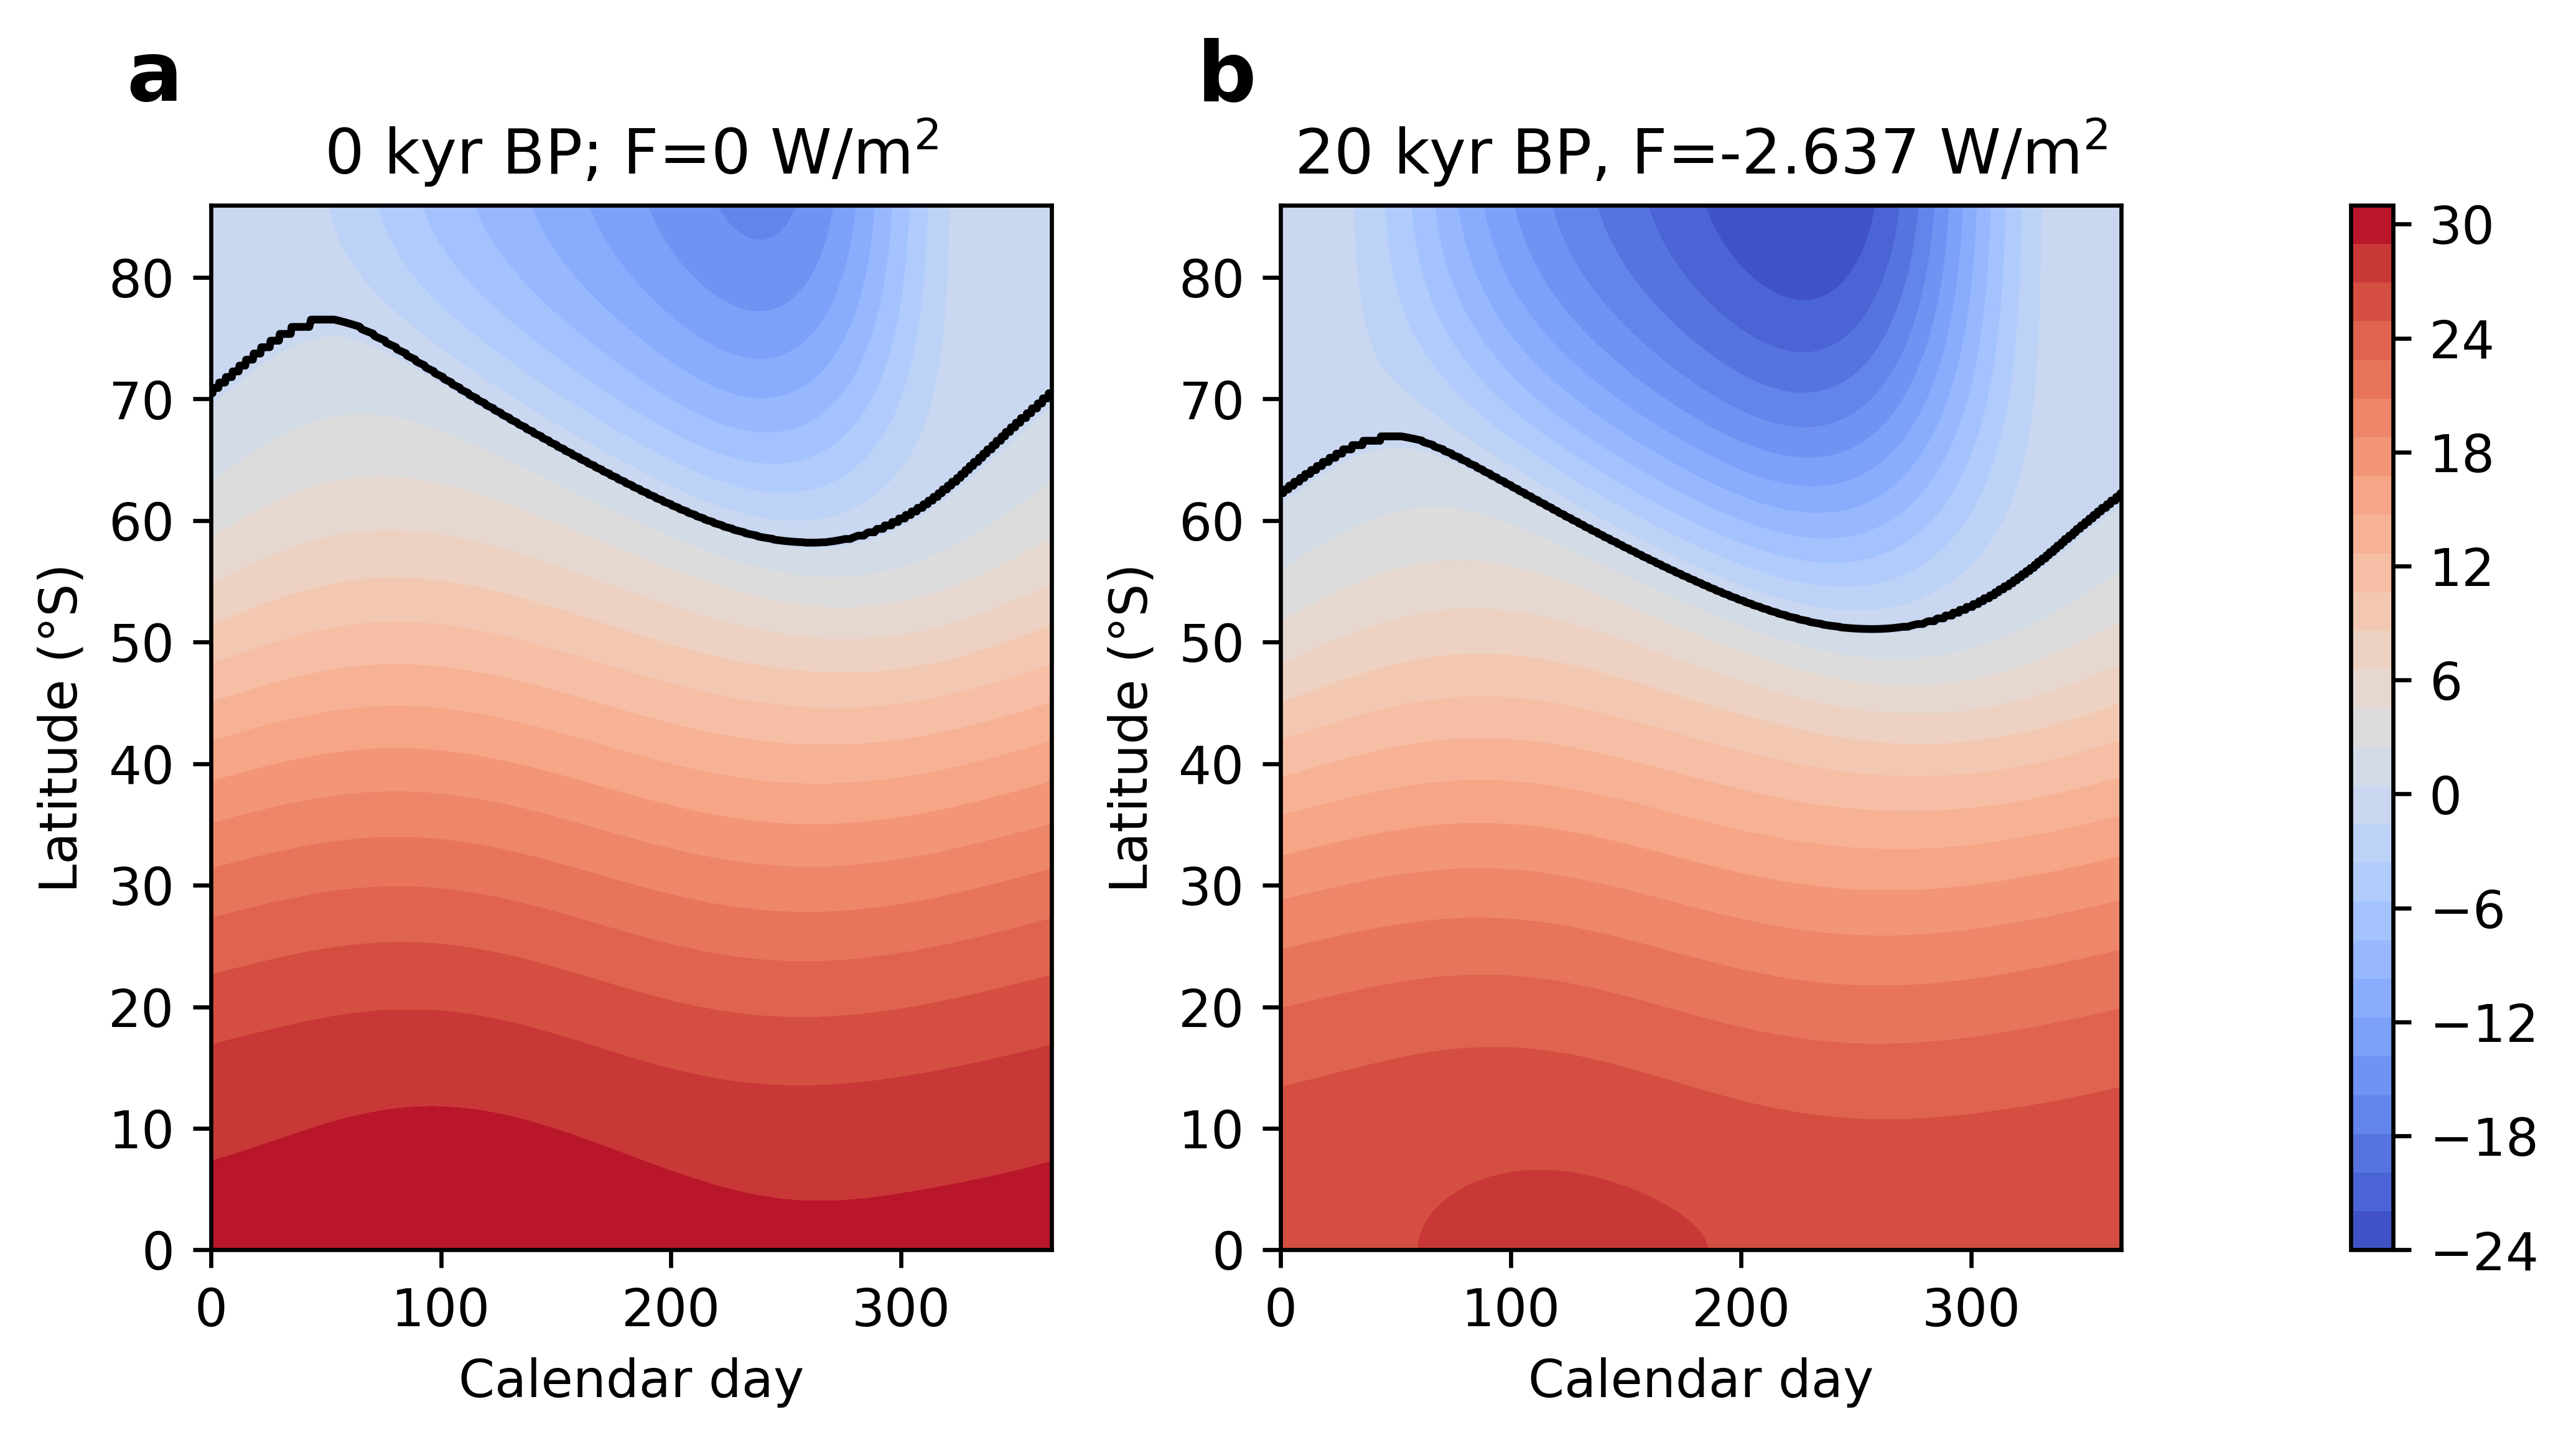

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

time_steps = 1000
grid_points = 400

# Create the spatial grid 'x' as in the MATLAB code
x = np.linspace(0, 1, grid_points, endpoint=False)  # Spatial grid from -1 to 1, similar to MATLAB 'x'

# Convert the spatial grid to actual latitudes (in degrees)
latitude = np.rad2deg(np.arcsin(x))  # Convert to latitude

# Create the meshgrid for plotting
time = np.linspace(0, 365.24, time_steps)  # Time from 0 to 1
X, Y = np.meshgrid(time, latitude)  # Meshgrid for plotting


T_c_lgm_transposed = T_c_20.T
T_c_now_transposed = T_c_0.T

age_now='0'
age_lgm='20'
forcing_now='0'
forcing_lgm='-2.637'


global_max = 31
global_min = -24
levels = np.linspace(np.floor(global_min), np.ceil(global_max), 28)

fig = plt.figure(figsize=(7, 4), dpi=600)

# Create a GridSpec with 2 columns
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1, 0.05])

# First plot
ax1 = plt.subplot(gs[0])
contour1 = ax1.contourf(X, Y, T_c_now_transposed, cmap='coolwarm', levels=levels, vmin=global_min, vmax=global_max)
ax1.contour(X, Y, T_c_now_transposed, levels=[0], colors='black')
ax1.set_xlabel('Calendar day')
ax1.set_ylabel('Latitude (°S)')
ax1.set_title(f'{age_now} kyr BP; F={forcing_now} W/m$^2$')

# Second plot
ax2 = plt.subplot(gs[1])
contour2 = ax2.contourf(X, Y, T_c_lgm_transposed, cmap='coolwarm', levels=levels, vmin=global_min, vmax=global_max)
ax2.contour(X, Y, T_c_lgm_transposed, levels=[0], colors='black')
ax2.set_xlabel('Calendar day')
ax2.set_ylabel('Latitude (°S)')
ax2.set_title(f'{age_lgm} kyr BP, F={forcing_lgm} W/m$^2$')

# add panel text 'a' and 'b' to the subplots
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, size=16, weight='bold')
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, size=16, weight='bold')

# Colorbar
cax = plt.subplot(gs[2])
fig.colorbar(contour2, cax=cax,ticks=np.arange(global_min, global_max + 1, 6))

plt.tight_layout()
plt.show()

output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig.savefig(output_path+'/LGM_0_T_contour.svg', format='svg', dpi=600)


# Compare the annual cycle of SH sea ice of EBM and observations

# Read the observed sea ice extend data
Processed data from Roach et al., 2022, https://doi.org/10.1038/s41561-022-00913-6

original data reference: Meier, W., Fetterer, F., Windnagel, A. & Stewart, J. NOAA/NSIDC Climate Data Record of Passive Microwave Sea Ice Concentration Version 4 (NSIDC, 2021).

In [40]:
import xarray as xr
siads = xr.open_dataset('D:/VScode/Last_deglaciation/data/sia_sie_daily_CDRv4_1979-2018.nc').rename({'time':'day'})
siads

<xarray.Dataset>
Dimensions:     (day: 365, year: 40)
Coordinates:
  * day         (day) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
  * year        (year) int64 1979 1980 1981 1982 1983 ... 2015 2016 2017 2018
Data variables:
    sia_nh_cdr  (year, day) float64 ...
    sia_nh_bt   (year, day) float64 ...
    sia_nh_nt   (year, day) float64 ...
    sie_nh_cdr  (year, day) float64 ...
    sie_nh_bt   (year, day) float64 ...
    sie_nh_nt   (year, day) float64 ...
    sia_sh_cdr  (year, day) float64 ...
    sia_sh_bt   (year, day) float64 ...
    sia_sh_nt   (year, day) float64 ...
    sie_sh_cdr  (year, day) float64 ...
    sie_sh_bt   (year, day) float64 ...
    sie_sh_nt   (year, day) float64 ...
Attributes: (12/41)
    Conventions:               CF-1.6, ACDD-1.3
    title:                     NOAA/NSIDC Climate Data Record of Passive Micr...
    references:                Comiso, J. C., and F. Nishio. 2008. Trends in ...
    comment:                   none
    program:                   NOAA Climate Data Record Program
    cdr_variable:              cdr_seaice_conc
    ...                        ...
    platform:                  NIMBUS-7
    sensor:                    SMMR > Scanning Multichannel Microwave Radiometer
    date_created:              2021-06-21T17:10:17Z
    time_coverage_start:       1979-01-01T00:00:00Z
    time_coverage_end:         1979-01-01T23:59:59Z
    processed:                 SIA and SIE computed by Lettie Roach, 2021

# Read the sea ice extent data from the EBM for age=0, F=0

In [43]:
# import scipy.io

# # Load the files
# iceA_corrected_data = scipy.io.loadmat('D:/VScode/Last_deglaciation/data/iceA_corrected.mat')

# iceA_corrected = iceA_corrected_data['iceA_corrected']


import scipy.io

path='D:/VScode/Last_deglaciation/EBM_data/'
iceA_c_0=scipy.io.loadmat(path+'iceA_c_0.mat')


iceA_c_0=iceA_c_0['iceA_c']

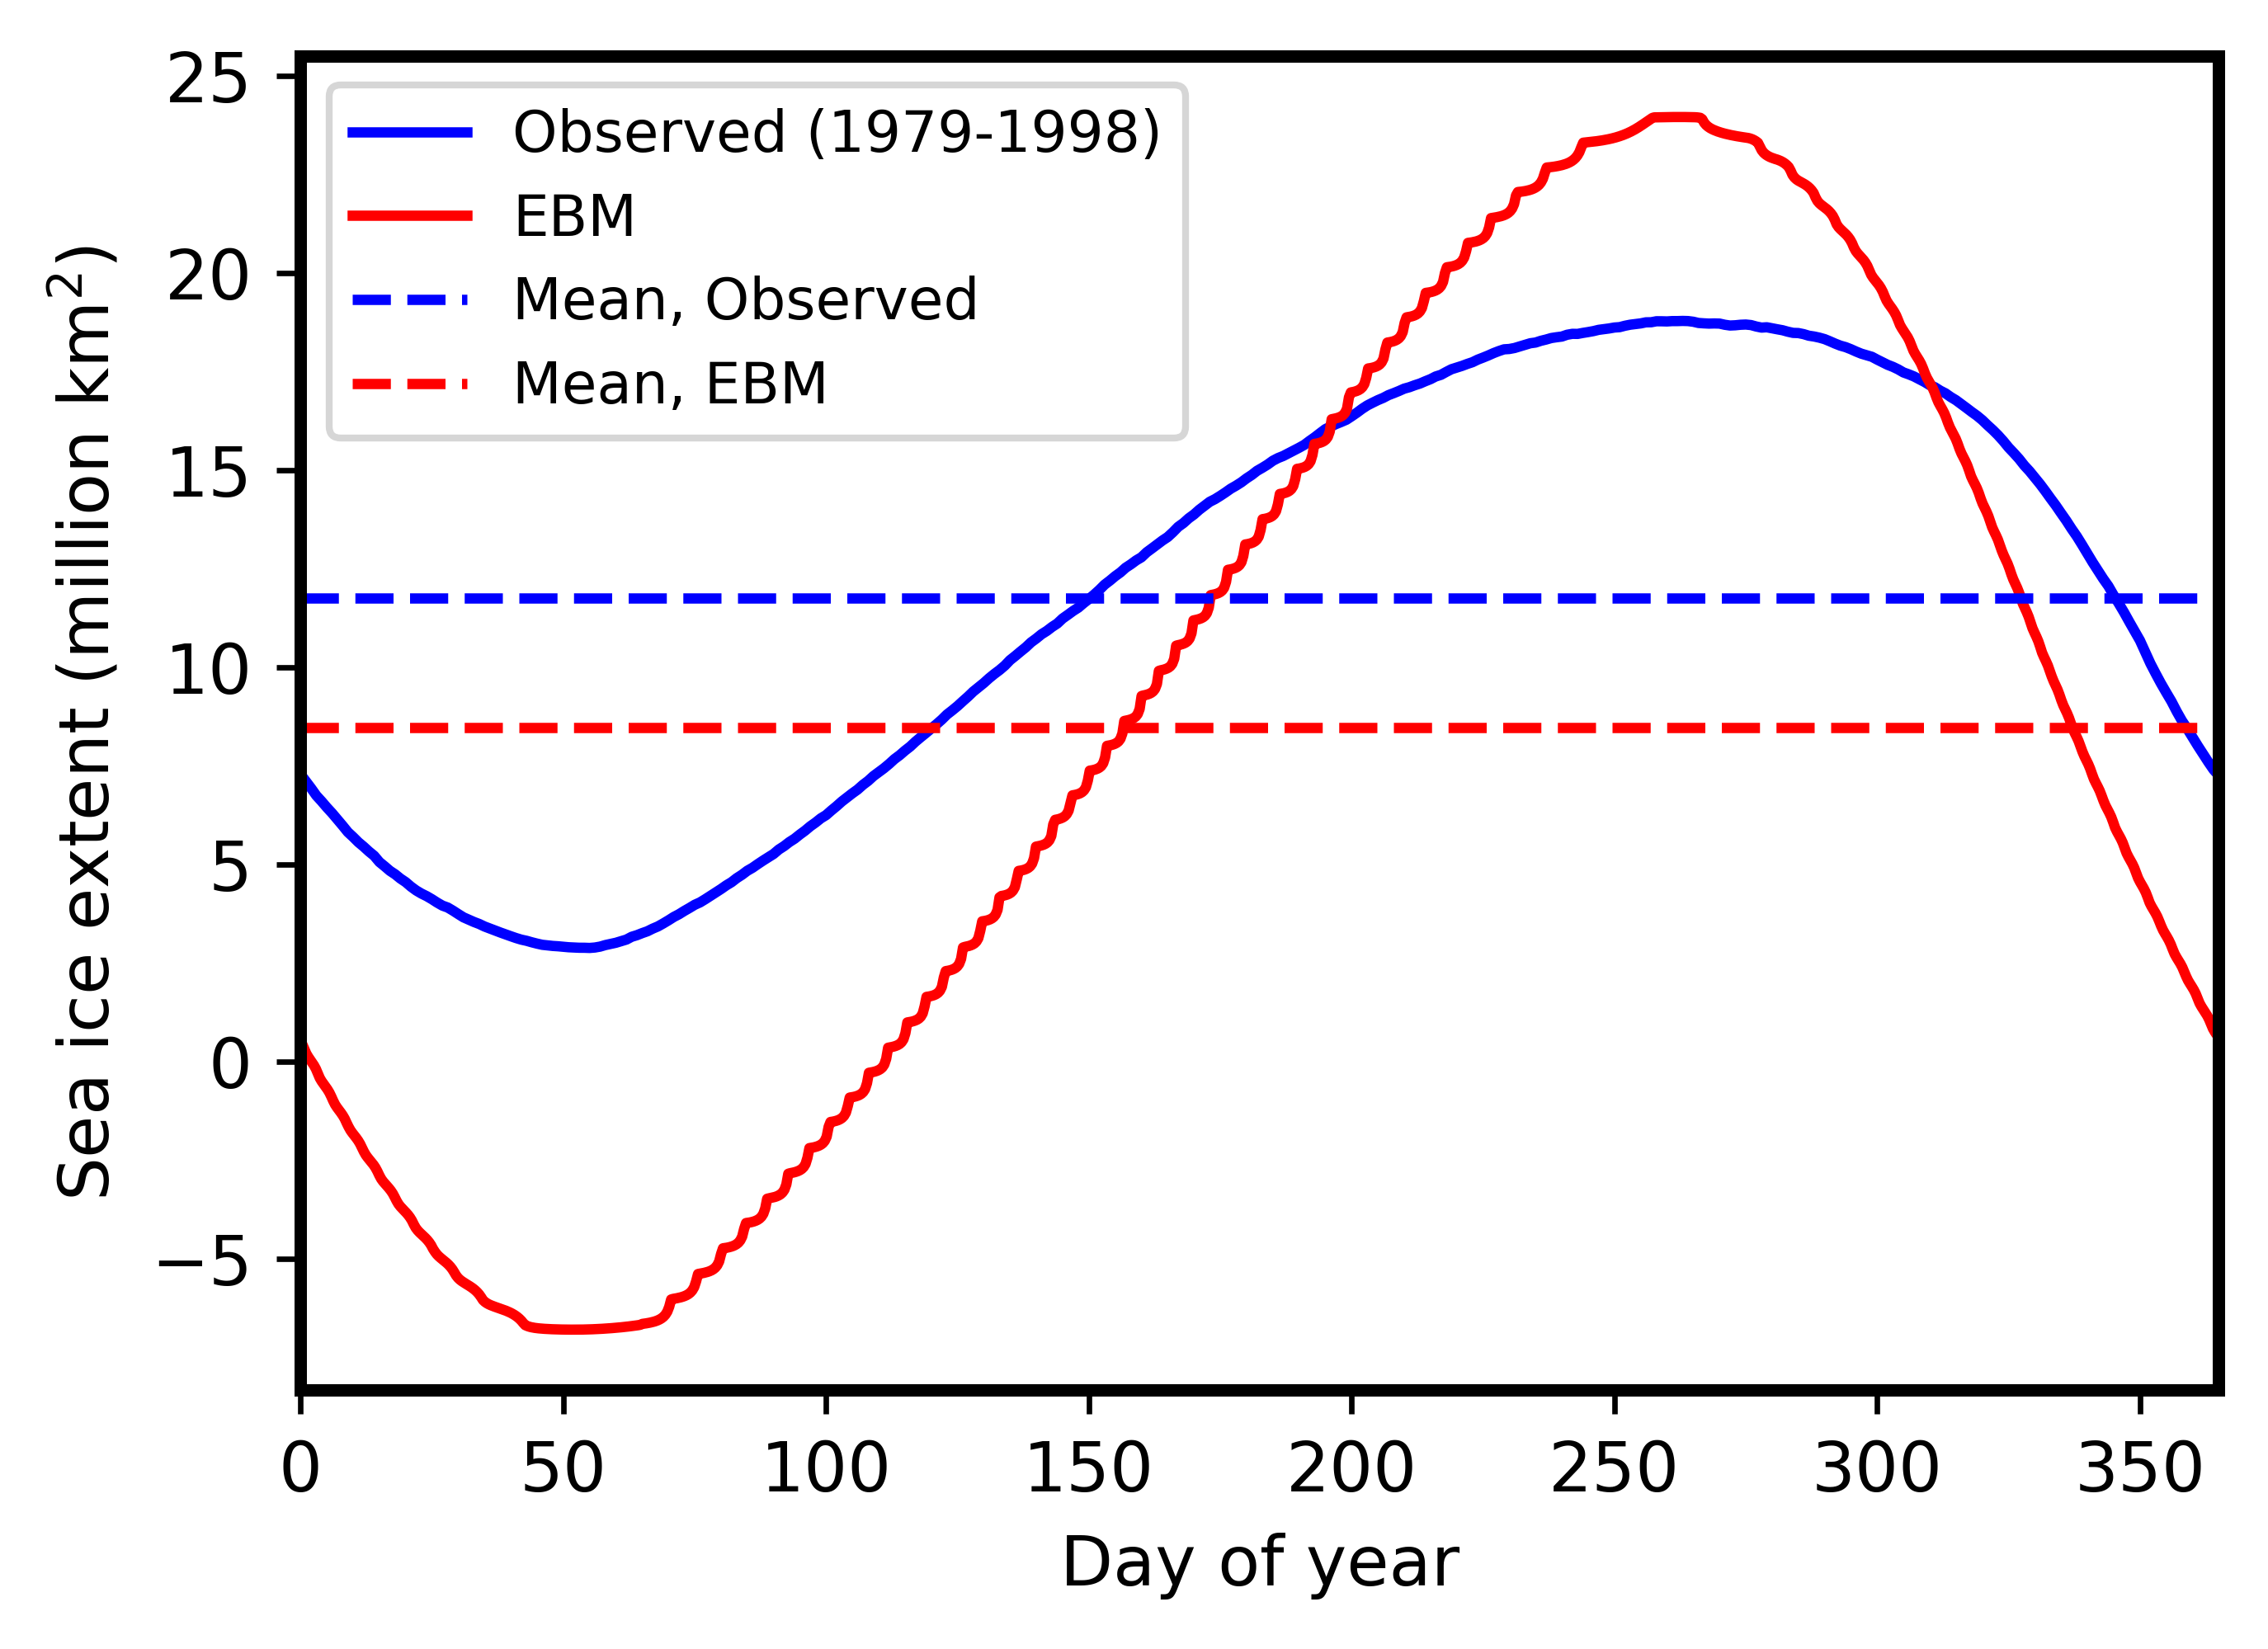

In [44]:
import matplotlib.pyplot as plt

sy = 1979
ey = 1998
myds = siads.sel(year=slice(sy,ey)).mean(dim='year')

fig = plt.figure(figsize=(5,3.5),dpi=600)
ax = fig.add_subplot(1, 1, 1)  # Adding a single subplot

myds['sie_sh_cdr'].plot(ax=ax, linestyle='-', color='b', label='Observed (1979-1998)')
ax.plot(np.linspace(0,365,1000), iceA_c_0, linestyle='-', color='r', label='EBM')
# plot the mean of myds['sie_sh_cdr'] as a horizontal line
ax.axhline(myds['sie_sh_cdr'].mean(), linestyle='--', color='b', label='Mean, Observed')
# plot the mean of iceA_corrected as a horizontal line
ax.axhline(iceA_c_0.mean(), linestyle='--', color='r', label='Mean, EBM')

# set the x axis limit
ax.set_xlim(0,365)

# add legend
ax.legend(loc='upper left', ncol=1, fontsize='small')
plt.xlabel('Day of year')
plt.ylabel('Sea ice extent (million km$^2$)')
# set the linewidth of the box to 1.8
ax.spines['top'].set_linewidth(1.8)
ax.spines['right'].set_linewidth(1.8)
ax.spines['bottom'].set_linewidth(1.8)
ax.spines['left'].set_linewidth(1.8)
plt.show()  # Show the plot


In [ ]:
output_path = 'D:/VScode/Last_deglaciation/fig_exp_temp/'
fig.savefig(output_path+'/EBM_IceA_obs_comp.svg', format='svg', dpi=600,bbox_inches='tight')